#### Informazione sulla cartella:

Tutti i risultati degli esercizi sono i file con estensione '.dat'.

Per generare nuovamente i file dei risultati basta usare il comando 'make' da terminale per compilare ed eseguire i codici. I file verrano generati automaticamente nella cartella corretta così che è sufficiente eseguire nuovamente il notebook per visualizzarli.

## 9.1

Per risolvere il problema del commesso viaggiatore obbligato a viaggiare tra $30$ città differenti disposte o in un quadrato di lato $l=1$ o lungo una circonferenza di raggio $r=1$, passando una e una sola volte in ognuna di esse e ritornando al punto di partenza, è stato implementato un algoritmo genetico che opera su una famiglia di $N$ possibili percorsi. L'algortimo procede secondo i seguenti passi:

* **Inizializzazione**: la posizione $(x_i,y_i )$ di ogni città con $i=0,1,2,..,29$ (in cui $i=0=29$ cioè quella di partenza e di arrivo coincidono) sulla circonferenza o nel quadrato viene inizializzata casualmente. Permutando casualmente per $N$ volte il vettore degli inidici delle città $i=1,2,..,29$ ($i=0$ escluso) si ottiene la popolazione iniziale di $N$ percorsi che ha sempre come punto di partenza la città $0$ e che non ha ripetizioni nel cammino.


* **Fitness**: per ognuno degli elementi della popolazione viene calcolata la distanza al quadrato percorsa dal commesso, che è la somma della distanza tra ogni coppia di citta: $L^{(2)}=\sum_{i=0}^{29} (x_i-x_{i+1})^2 + (y_i-y_{i+1})^2$ con $i=29=0$ cioè la città finiale deve coincidere con quella iniziale.


* **Selezione**: per selezionare uno dei due genitori che servono per generare ognuno degli $N$ figli che costituiscono la generazione successiva viene generato un numero intero casaule $p \in [0,29]$, i $p$ percorsi con distanza minima vengono tenuti e tra di essi viene selezionato un genitore casualmente. La prima selezione permette di ottemere con maggiore probabilità i percorsi migliori mentre la seconda selezione permette una certa variabilità.


* **Crossover**: dopo aver selezionato i due genitori (usando due volte il metodo di selezione) viene generato un figlio dividendo ognuno dei percorsi in tre sezioni caratterizzate da un indice: gli inidici che vengono usati per la divisione in tre parti sono index_start e index_end. Il figlio è ottenuto copiando la sezione del primo genitore compreso tra i due indici ed inserendo nella sezioni con indice minore di inedx_start gli elementi del secondo genitore partendo dal primo e non già presenti. Analogamente si genera la sezione con inidice maggiore di index_end del figlio. Segue un esempio:

 * i genitori sono: $\left[1,4,3,5,2\right] \quad \left[1,2,3,4,5\right]$,
 * vengono generati index_start=1 ed index_end=3,
 * la sezione centrale del figlio viene generata da quella centrale del primo genitore $\left[*,4,3, *, *, * \right]$,
 * a sinistra viene inserito il primo elemento del secondo genitore: $\left[1,4,3,*, * \right]$,
 * a destra vengono inseriti i restanti elmenti del secondo genitore non già presenti: $\left[1,4,3,2,5 \right]$.


* **Mutazione**: ognuno dei figli viene mutato con probailità $p$, cioè con tale probabilità si permuta una coppia di città selezionate casualmente.

Il processo di selezione, crossover e mutazione viene iterato fino ad ottenere una nuova popolazione di $40$ inidividui che sostituisce quella iniziale.

La popolazione di $N=40$ è stata lasciata evolvere per $2000$ generazioni in passi da $50$ generazioni con una probabilità di mutazione $p=0.1$ e $p=0.2$ rispettivamente per le città lungo la circonferenza e nel quadrato. Tali parametri della probabilità di mutazione sono stati scelti poichè si ottiene la minima distanza ($L^{(2)}$) in confronto alle altre ottenute variandoli. Si osserva che aumentando la popolazione e diminuendo il tasso di mutazione il valore minimo della distanza peggiora nel caso del quadrato e rimane stabile nel caso del cerchio per cui è stata utilizzata una popolazione ridotta.

Di seguito sono riportati i grafici, in funzione delle generazioni, della minima distanza, della distanza media calcolata con la miglior metà della poplazione ad ogni iterazione e del miglior percorso all'ultima generazione nei due casi: città disposte nel quadrato e lungo la circonferenza.

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

### Quadrato

minima distanza:  0.997978
miglior valor medio:  0.997978


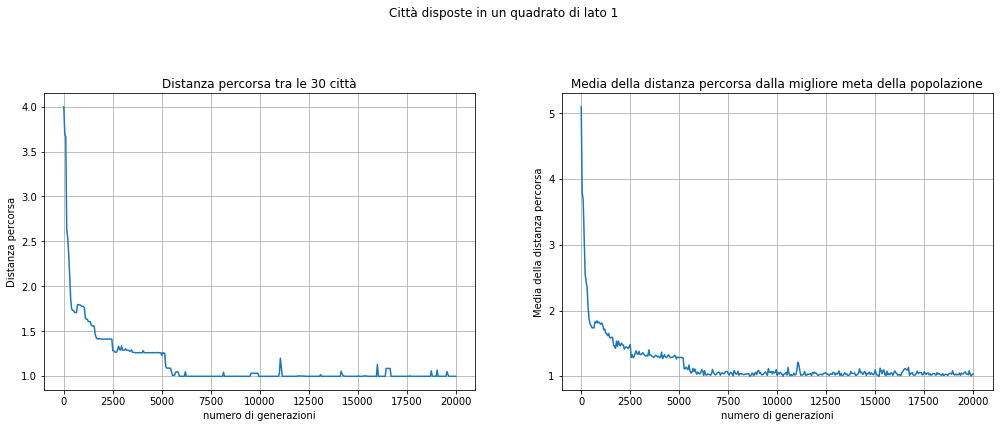

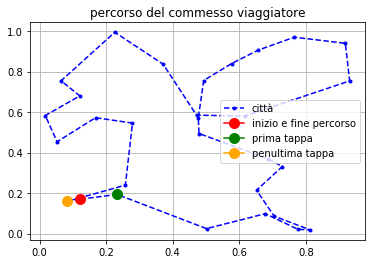

In [17]:
plt.figure(figsize=(17,12))
plt.suptitle('Città disposte in un quadrato di lato 1') 

plt.subplot(2,2,1)
x, y = np.loadtxt("Distanze_quadrato.dat", usecols=(0,1), delimiter=' ', unpack='true')
print('minima distanza: ', y[len(y)-1])
plt.plot(x,y)
plt.xlabel('numero di generazioni')
plt.ylabel(r'Distanza percorsa')
plt.title('Distanza percorsa tra le 30 città')
plt.grid(True)


plt.subplot(2,2,2)
x, y = np.loadtxt("Mean_quadrato.dat", usecols=(0,1), delimiter=' ', unpack='true')
print('miglior valor medio: ', np.min(y))
plt.plot(x,y)
plt.xlabel('numero di generazioni')
plt.ylabel(r'Media della distanza percorsa')
plt.title('Media della distanza percorsa dalla migliore meta della popolazione')
plt.grid(True)
plt.show()


n,x,y= np.loadtxt("BestPath_quadrato.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.plot(x,y, marker='.', label='città', color='blue', linestyle='--')
plt.plot(x[0],y[0], marker='.', markersize=20, label='inizio e fine percorso', color='red')
plt.plot(x[1],y[1], marker='.', markersize=20, label='prima tappa', color='green')
plt.plot(x[len(x)-2],y[len(y)-2], marker='.', markersize=20, label='penultima tappa', color='orange')
plt.title('percorso del commesso viaggiatore')
plt.legend()
plt.grid(True)

plt.show()

### Quadrato

minima distanza:  3.18637
miglior valor medio:  3.22756


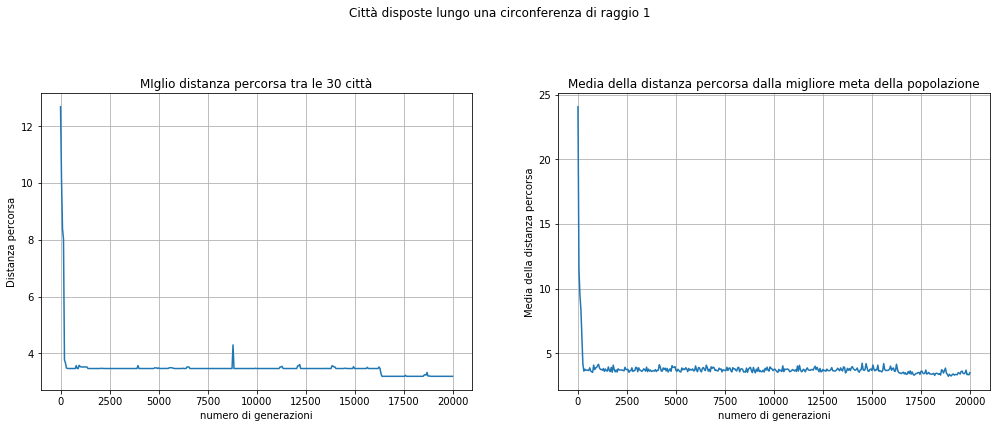

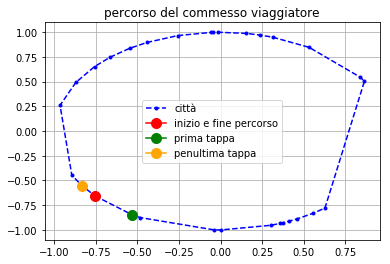

In [15]:
plt.figure(figsize=(17,12))
plt.suptitle('Città disposte lungo una circonferenza di raggio 1') 

plt.subplot(2,2,1)
x, y = np.loadtxt("Distanze_cerchio.dat", usecols=(0,1), delimiter=' ', unpack='true')
print('minima distanza: ', y[len(y)-1])
plt.plot(x,y)

plt.xlabel('numero di generazioni')
plt.ylabel(r'Distanza percorsa')

plt.title('MIglio distanza percorsa tra le 30 città')
plt.grid(True)

plt.subplot(2,2,2)
x, y = np.loadtxt("Mean_cerchio.dat", usecols=(0,1), delimiter=' ', unpack='true')
print('miglior valor medio: ', np.min(y))
plt.plot(x,y)
plt.xlabel('numero di generazioni')
plt.ylabel(r'Media della distanza percorsa')
plt.title('Media della distanza percorsa dalla migliore meta della popolazione')
plt.grid(True)
plt.show()


n,x,y= np.loadtxt("BestPath_cerchio.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.plot(x,y, marker='.', label='città', color='blue', linestyle='--')
plt.plot(x[0],y[0], marker='.', markersize=20, label='inizio e fine percorso', color='red')
plt.plot(x[1],y[1], marker='.', markersize=20, label='prima tappa', color='green')

plt.plot(x[len(x)-2],y[len(y)-2], marker='.', markersize=20, label='penultima tappa', color='orange')


plt.title('percorso del commesso viaggiatore')
plt.legend()
plt.grid(True)
plt.show()
